In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Outcome = 1 Diabetes Patient
# Outcome = 0 Healthy
data = pd.read_csv("diabetes.csv")
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


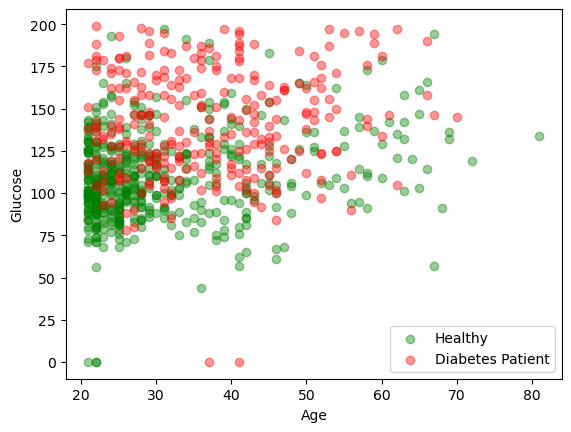

In [2]:


diabetes_patient = data[data.Outcome == 1]
healthy = data[data.Outcome == 0]


# For now, let's make an example drawing just by looking at gloucose:
# At the end of our program, our machine learning model will make a prediction by looking not only at glucose but also at all other data.
plt.scatter(healthy.Age, healthy.Glucose, color="green", label="Healthy", alpha = 0.4)
plt.scatter(diabetes_patient.Age, diabetes_patient.Glucose, color="red", label="Diabetes Patient", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


In [ ]:


# Let's determine the x and y axes
y = data.Outcome.values

x_raw_data = data.drop(["Outcome"], axis=1)   
# We remove the Outcome column (dependent variable) and leave only independent variables.
# Because KNN algorithm will group within x values..


# we do normalization - we update all the values in x_raw_data so that they are only between 0 and 1
# If we do not normalize in this way, high numbers will crush small numbers and may mislead the KNN algorithm!
x = (x_raw_data-np.min(x_raw_data))/(np.max(x_raw_data)-np.min(x_raw_data))

# before
print("Raw data before normalization:\n")
print(x_raw_data.head())


# later
print("\n\n\nData to provide training to AI after normalization:\n")
print(x.head())
    



In [ ]:

# We separate our train data and test data
# Our train data will be used to learn how the system can distinguish between healthy people and sick people
# As for our test data, let's see if our machine learning model can accurately distinguish between sick and healthy people.
# will be used to test...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)

#We create our knn model.
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("Validation test result of our test data for K=3 ", knn.score(x_test, y_test))


In [ ]:




# What should k be?
# let's determine the best k value..
counter = 1
for k in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = k)
    knn_new.fit(x_train,y_train)
    print(counter, "  ", "Accuracy rate: %", knn_new.score(x_test,y_test)*100)
    counter += 1
    
    

In [ ]:
# For a new patient prediction:
from sklearn.preprocessing import MinMaxScaler

# we are doing normalization - we used MinMax scaler to normalize faster.
new = MinMaxScaler()
new.fit_transform(x_raw_data )

new_prediction = knn.predict(new.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]